##### QWebEngineView 顯示網頁元件
QWebEngineView 是 PyQt5 裡的負責顯示網頁的元件，這篇教學會介紹如何在 PyQt5 視窗裡加入 QWebEngineView，\
並透過 QWebEngineView 顯示特定網頁以及進行簡單互動。

##### 加入 QWebEngineView 顯示網頁元件 
要使用 QWebEngineView 需要先安裝 PyQtWebEngine 函式庫，輸入下方指令進行安裝：

pip install PyQtWebEngine

安裝 PyQtWebEngine 函式庫之後，使用 QtWebEngineWidgets.QWebEngineView() 方法建立網頁顯示元件，\
就能透過 load() 方法載入網頁 ( 需要使用 QtCore.QUrl(URL) 載入網頁的網址 )。

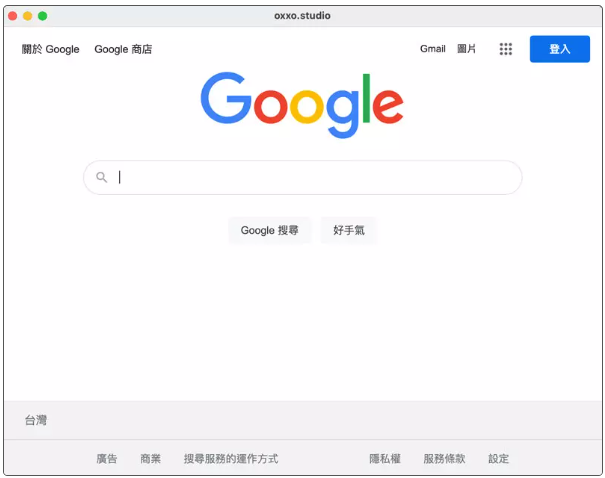

In [ ]:
from PyQt5 import QtWidgets, QtCore, QtWebEngineWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(800, 600)

widget = QtWebEngineWidgets.QWebEngineView(Form)  # 建立網頁顯示元件
widget.move(0,0)
widget.resize(800, 600)
widget.load(QtCore.QUrl("https://google.com"))    # 載入網頁

Form.show()
sys.exit(app.exec_())

##### 網頁控制常用方法 
載入網頁後，可以透過下列幾種常用方法，控制網頁顯示元件：

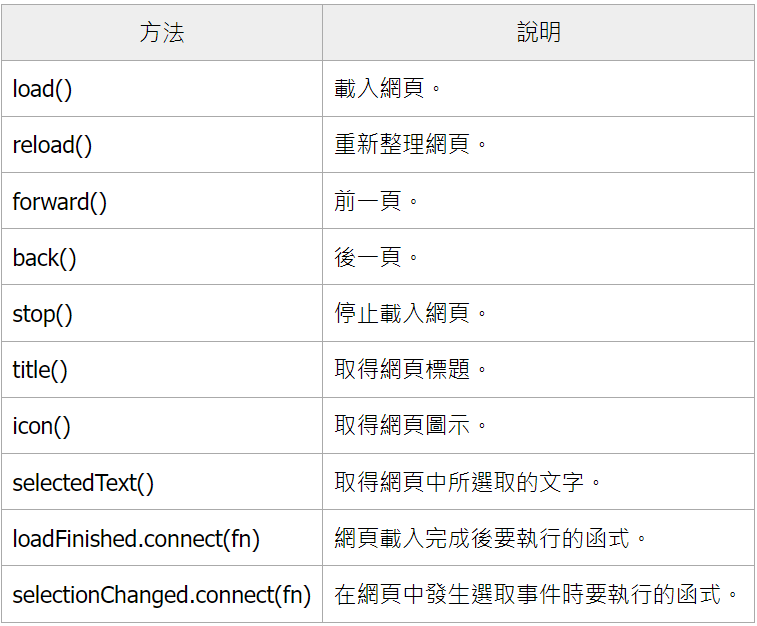

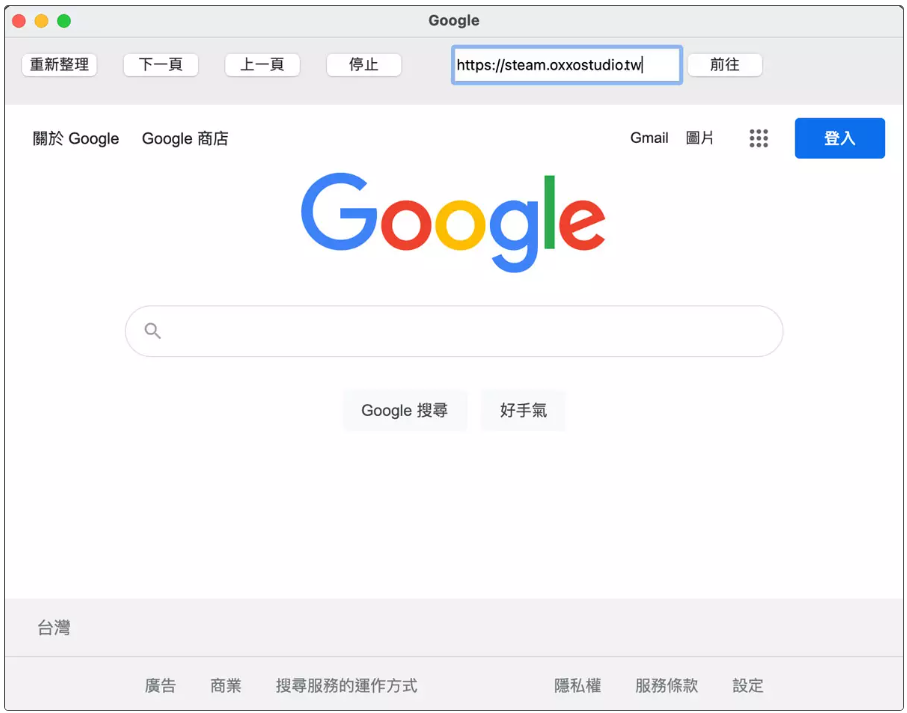

In [ ]:
from PyQt5 import QtWidgets, QtCore, QtWebEngineWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(800, 600)

btn1 = QtWidgets.QPushButton(Form)
btn1.setGeometry(10,10,80,30)
btn1.setText('重新整理')
btn1.clicked.connect(lambda: widget.reload())  # 重新載入網頁

btn2 = QtWidgets.QPushButton(Form)
btn2.setGeometry(100,10,80,30)
btn2.setText('下一頁')
btn2.clicked.connect(lambda: widget.forward())  # 前往上一頁

btn3 = QtWidgets.QPushButton(Form)
btn3.setGeometry(190,10,80,30)
btn3.setText('上一頁')
btn3.clicked.connect(lambda: widget.back())    # 前往下一頁

btn4 = QtWidgets.QPushButton(Form)
btn4.setGeometry(280,10,80,30)
btn4.setText('停止')
btn4.clicked.connect(lambda: widget.stop())    # 停止網頁載入

input = QtWidgets.QLineEdit(Form)    # 建立單行輸入框
input.setGeometry(400,10,200,30)

def go():
    url = input.text()
    widget.load(QtCore.QUrl(url))    # 載入輸入的網址

btn5 = QtWidgets.QPushButton(Form)
btn5.setGeometry(600,10,80,30)
btn5.setText('前往')
btn5.clicked.connect(go)             # 按下前往按鈕，執行 go 函式

def finished():
    Form.setWindowTitle(widget.title())  # 更新視窗標題
    Form.setWindowIcon(widget.icon())    # 更新視窗圖示

def show():
    print(widget.selectedText())         # 印出選取的文字

widget = QtWebEngineWidgets.QWebEngineView(Form)
widget.move(0,60)
widget.resize(800, 540)
widget.load(QtCore.QUrl('https://google.com'))
widget.loadFinished.connect(finished)
widget.selectionChanged.connect(show)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示。

In [ ]:
# 导入所需的模块，包括用于GUI的QtWidgets，用于处理URL和其他核心功能的QtCore，以及QtWebEngineWidgets，用于显示网页。
from PyQt5 import QtWidgets, QtCore, QtWebEngineWidgets
import sys  # 用于系统相关的操作，如命令行参数处理和程序退出。

# 定义一个MyWidget类，继承自QtWidgets.QWidget，提供基础窗口功能。
class MyWidget(QtWidgets.QWidget):
    # 类的初始化函数。
    def __init__(self):
        super().__init__()  # 调用父类的构造函数。
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题。
        self.resize(800, 600)  # 设置窗口大小。
        self.web()  # 调用web方法，初始化网页视图。
        self.ui()  # 调用ui方法，初始化用户界面。

    # 初始化网页视图。
    def web(self):
        self.widget = QtWebEngineWidgets.QWebEngineView(self)  # 创建一个网页视图对象。
        self.widget.move(0, 60)  # 设置网页视图的位置。
        self.widget.resize(800, 540)  # 设置网页视图的大小。
        self.widget.load(QtCore.QUrl('https://google.com'))  # 加载一个网页。
        # 连接信号与槽，loadFinished在网页加载完成时触发，selectionChanged在选中的文本改变时触发。
        self.widget.loadFinished.connect(self.finished)  
        self.widget.selectionChanged.connect(self.showMsg)

    # 初始化用户界面。
    def ui(self):
        # 创建按钮，并设置位置、大小和文本。
        self.btn1 = QtWidgets.QPushButton(self)
        self.btn1.setGeometry(10, 10, 80, 30)
        self.btn1.setText('重新整理')
        self.btn1.clicked.connect(lambda: self.widget.reload())  # 绑定点击事件到reload方法。

        self.btn2 = QtWidgets.QPushButton(self)
        self.btn2.setGeometry(100, 10, 80, 30)
        self.btn2.setText('下一頁')
        self.btn2.clicked.connect(lambda: self.widget.forward())  # 绑定点击事件到forward方法。

        self.btn3 = QtWidgets.QPushButton(self)
        self.btn3.setGeometry(190, 10, 80, 30)
        self.btn3.setText('上一頁')
        self.btn3.clicked.connect(lambda: self.widget.back())  # 绑定点击事件到back方法。

        self.btn4 = QtWidgets.QPushButton(self)
        self.btn4.setGeometry(280, 10, 80, 30)
        self.btn4.setText('停止')
        self.btn4.clicked.connect(lambda: self.widget.stop())  # 绑定点击事件到stop方法。

        self.btn5 = QtWidgets.QPushButton(self)
        self.btn5.setGeometry(600, 10, 80, 30)
        self.btn5.setText('前往')
        self.btn5.clicked.connect(self.go)  # 绑定点击事件到go方法。

        self.input = QtWidgets.QLineEdit(self)  # 创建一个输入框。
        self.input.setGeometry(400, 10, 200, 30)  # 设置输入框位置和大小。

    # 定义go方法，用于加载输入框中的URL。
    def go(self):
        url = self.input.text()  # 获取输入框中的文本。
        self.widget.load(QtCore.QUrl(url))  # 加载输入的URL。

    # 定义finished方法，当网页加载完成时调用。
    def finished(self):
        self.setWindowTitle(self.widget.title())  # 设置窗口标题为网页标题。
        self.setWindowIcon(self.widget.icon())  # 设置窗口图标为网页图标。

    # 定义showMsg方法，用于显示选中的文本。
    def showMsg(self):
        print(self.widget.selectedText())  # 打印选中的文本。

# 程序入口。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建应用程序对象。
    Form = MyWidget()  # 创建窗口对象。
    Form.show()  # 显示窗口。
    sys.exit(app.exec_())  # 开始事件循环，等待用户操作。